# PCA

In [3]:
# Importing the dataset
dataset = read.csv('Wine.csv')

## Splitting the dataset into the Training set and Test set

In [4]:
library(caTools)
set.seed(123)
split = sample.split(dataset$Customer_Segment, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.4.3"

In [5]:
# Feature Scaling
training_set[-14] = scale(training_set[-14])
test_set[-14] = scale(test_set[-14])

## Applying PCA

In [6]:
library(caret)
library(e1071)
pca = preProcess(x = training_set[-14], method = 'pca', pcaComp = 2)
training_set = predict(pca, training_set)
training_set = training_set[c(2, 3, 1)]
test_set = predict(pca, test_set)
test_set = test_set[c(2, 3, 1)]

Warning message:
"package 'caret' was built under R version 3.4.4"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'e1071' was built under R version 3.4.3"

## Fitting SVM to the Training set

In [7]:
library(e1071)
classifier = svm(formula = Customer_Segment ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'linear')

In [8]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

In [9]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

## Visualising the Training set results

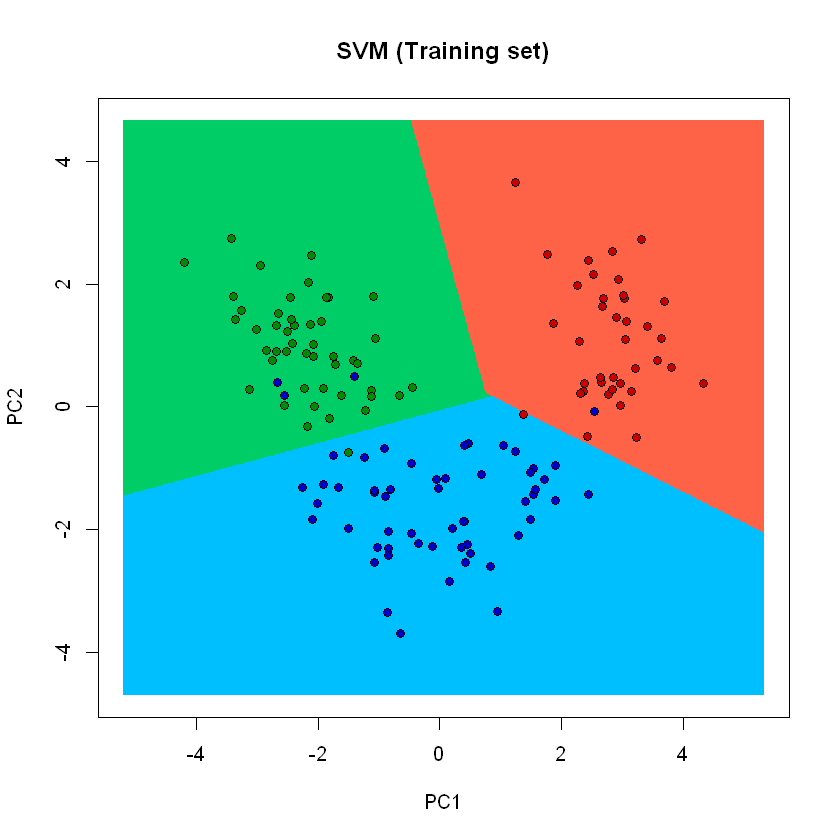

In [10]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

## Visualising the Test set results

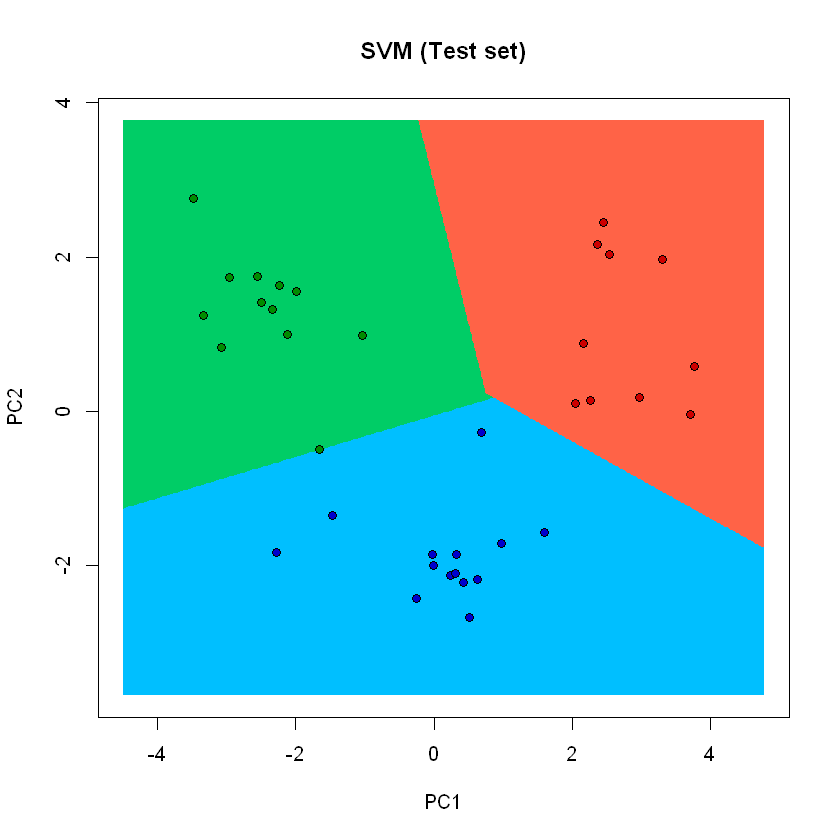

In [11]:
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))